In [5]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import dabl

import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [6]:
data= pd.read_csv('Employee_Data.csv')

In [7]:
data.shape

(1470, 17)

In [8]:
data.columns

Index(['Unnamed: 0', 'EmployeeNumber', 'Age', 'Gender', 'MaritalStatus',
       'EducationField', 'Department', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'Attrition'],
      dtype='object')

In [9]:
pd.set_option('max_columns', 100)
data.head()

,Unnamed: 0,EmployeeNumber,Age,Gender,MaritalStatus,EducationField,Department,JobLevel,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,Attrition
0,0,1,41,Female,Single,Life Sciences,Sales,2,5993,8,Yes,3,11,8,6,4,Yes
1,1,2,49,Male,Married,Life Sciences,Research & Development,2,5130,1,No,4,23,10,10,7,No
2,2,4,37,Male,Single,Other,Research & Development,1,2090,6,Yes,3,15,7,0,0,Yes
3,3,5,33,Female,Married,Life Sciences,Research & Development,1,2909,1,Yes,3,11,8,8,7,No
4,4,7,27,Male,Married,Medical,Research & Development,1,3468,9,No,3,12,6,2,2,No


In [10]:
data.tail()

,Unnamed: 0,EmployeeNumber,Age,Gender,MaritalStatus,EducationField,Department,JobLevel,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,Attrition
1465,1465,2061,36,Male,Married,Medical,Research & Development,2,2571,4,No,3,17,17,5,2,No
1466,1466,2062,39,Male,Married,Medical,Research & Development,3,9991,4,No,3,15,9,7,7,No
1467,1467,2064,27,Male,Married,Life Sciences,Research & Development,2,6142,1,Yes,4,20,6,6,2,No
1468,1468,2065,49,Male,Married,Medical,Sales,2,5390,2,No,3,14,17,9,6,No
1469,1469,2068,34,Male,Married,Medical,Research & Development,2,4404,2,No,3,12,6,4,3,No


In [11]:
data.sample(5)

,Unnamed: 0,EmployeeNumber,Age,Gender,MaritalStatus,EducationField,Department,JobLevel,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,Attrition
929,929,1296,28,Male,Married,Life Sciences,Research & Development,1,3867,1,Yes,3,12,2,2,2,No
393,393,523,34,Female,Married,Marketing,Sales,2,6538,9,No,3,15,6,3,2,No
528,528,723,50,Male,Married,Technical Degree,Sales,2,6796,3,Yes,3,14,18,4,3,Yes
273,273,378,37,Male,Married,Medical,Sales,2,6502,4,No,3,14,7,5,4,No
1433,1433,2018,25,Female,Divorced,Other,Sales,2,4907,0,Yes,4,22,6,5,3,No


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          1470 non-null   int64 
 1   EmployeeNumber      1470 non-null   int64 
 2   Age                 1470 non-null   int64 
 3   Gender              1470 non-null   object
 4   MaritalStatus       1470 non-null   object
 5   EducationField      1470 non-null   object
 6   Department          1470 non-null   object
 7   JobLevel            1470 non-null   int64 
 8   MonthlyIncome       1470 non-null   int64 
 9   NumCompaniesWorked  1470 non-null   int64 
 10  OverTime            1470 non-null   object
 11  PerformanceRating   1470 non-null   int64 
 12  PercentSalaryHike   1470 non-null   int64 
 13  TotalWorkingYears   1470 non-null   int64 
 14  YearsAtCompany      1470 non-null   int64 
 15  YearsInCurrentRole  1470 non-null   int64 
 16  Attrition           1470

## Inferential Statistics

In [13]:
data.describe().iloc[1:,:].style.background_gradient(cmap='Reds')

,Unnamed: 0,EmployeeNumber,Age,JobLevel,MonthlyIncome,NumCompaniesWorked,PerformanceRating,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole
mean,734.500000,1024.865306,36.923810,2.063946,6502.931293,2.693197,3.153741,15.209524,11.279592,7.008163,4.229252
std,424.496761,602.024335,9.135373,1.106940,4707.956783,2.498009,0.360824,3.659938,7.780782,6.126525,3.623137
min,0.000000,1.000000,18.000000,1.000000,1009.000000,0.000000,3.000000,11.000000,0.000000,0.000000,0.000000
25%,367.250000,491.250000,30.000000,1.000000,2911.000000,1.000000,3.000000,12.000000,6.000000,3.000000,2.000000
50%,734.500000,1020.500000,36.000000,2.000000,4919.000000,2.000000,3.000000,14.000000,10.000000,5.000000,3.000000
75%,1101.750000,1555.750000,43.000000,3.000000,8379.000000,4.000000,3.000000,18.000000,15.000000,9.000000,7.000000
max,1469.000000,2068.000000,60.000000,5.000000,19999.000000,9.000000,4.000000,25.000000,40.000000,40.000000,18.000000


### Correlation

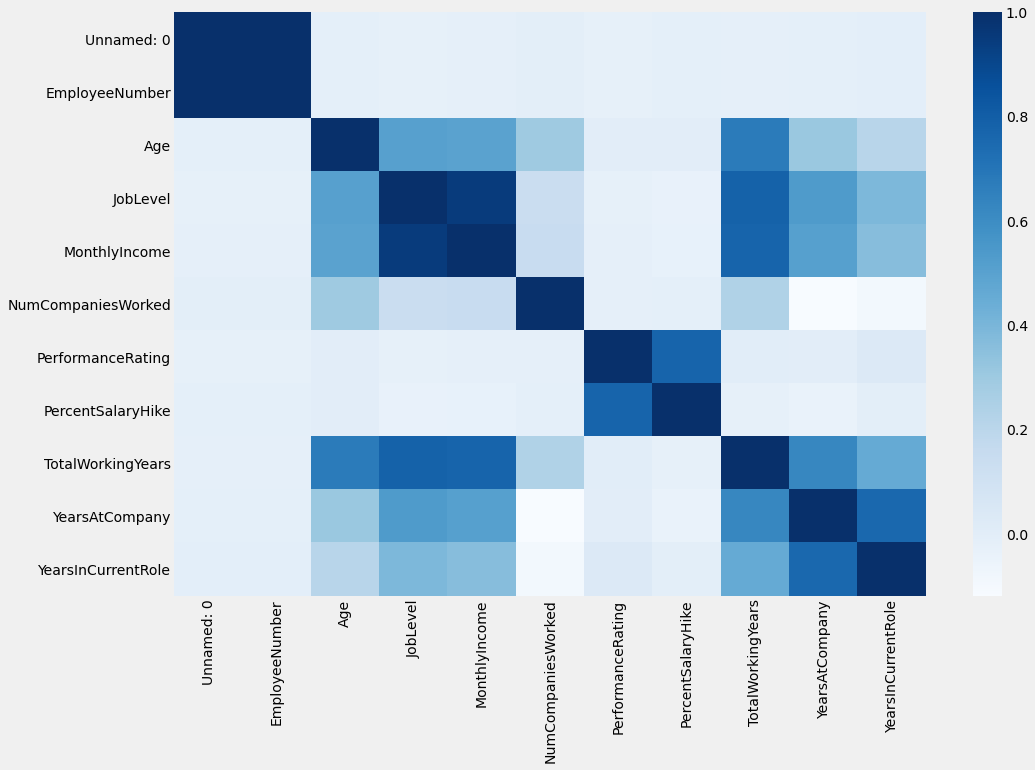

In [14]:
plt.rcParams['figure.figsize']=(15,10)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
sns.heatmap(data.corr(), cmap='Blues')
plt.show()

In [15]:
# Covariance
data.cov().iloc[1:, 1:]

,EmployeeNumber,Age,JobLevel,MonthlyIncome,NumCompaniesWorked,PerformanceRating,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole
EmployeeNumber,362433.299749,-55.797199,-12.341279,-4.202853e+04,-1.881380,-4.422436,-28.520432,-67.289749,-41.458396,-18.357800
Age,-55.797199,83.455049,5.153276,2.141220e+04,6.837739,0.006276,0.121489,48.361684,17.423359,7.046750
JobLevel,-12.341279,5.153276,1.225316,4.952417e+03,0.394036,-0.008476,-0.140705,6.737044,3.626435,1.561913
MonthlyIncome,-42028.530023,21412.198982,4952.416922,2.216486e+07,1758.376455,-29.082690,-469.860339,28312.303770,14833.730990,6205.846259
NumCompaniesWorked,-1.881380,6.837739,0.394036,1.758376e+03,6.240049,-0.012704,-0.093604,4.618854,-1.812334,-0.821380
PerformanceRating,-4.422436,0.006276,-0.008476,-2.908269e+01,-0.012704,0.130194,1.021544,0.018933,0.007594,0.045738
PercentSalaryHike,-28.520432,0.121489,-0.140705,-4.698603e+02,-0.093604,1.021544,13.395144,-0.586872,-0.807021,-0.020156
TotalWorkingYears,-67.289749,48.361684,6.737044,2.831230e+04,4.618854,0.018933,-0.586872,60.540563,29.942577,12.978065
YearsAtCompany,-41.458396,17.423359,3.626435,1.483373e+04,-1.812334,0.007594,-0.807021,29.942577,37.534310,16.842239
YearsInCurrentRole,-18.357800,7.046750,1.561913,6.205846e+03,-0.821380,0.045738,-0.020156,12.978065,16.842239,13.127122


## Data Analysis

c:\users\pooja singh\appdata\local\programs\python\python36\lib\site-packages\dabl\preprocessing.py:286: UserWarning: Suspiciously looks like an index: ['EmployeeNumber'], but unsure, so keeping it for now
  " so keeping it for now".format(warn_for), UserWarning)


Target looks like classification
Linear Discriminant Analysis training set score: 0.500


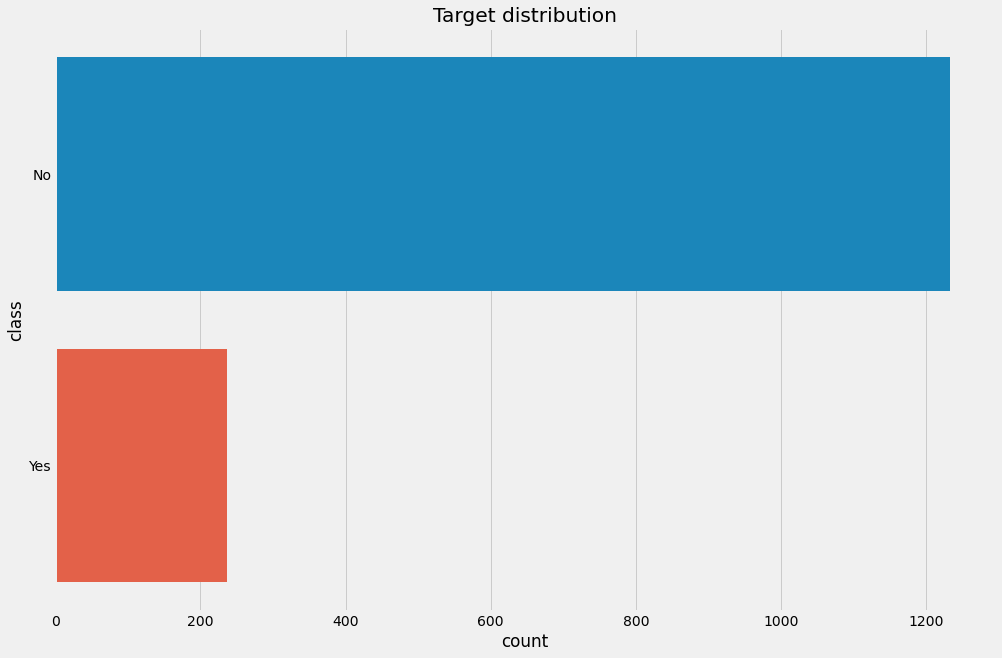

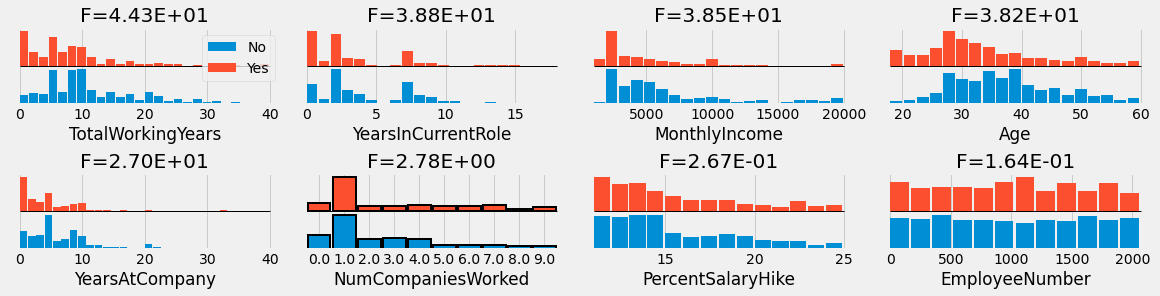

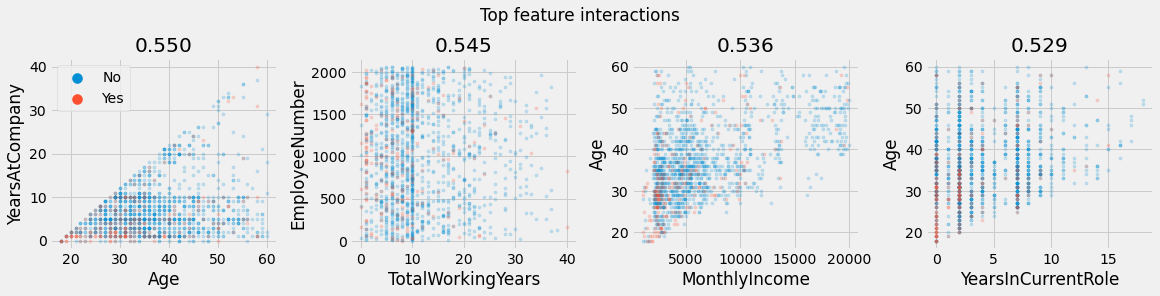

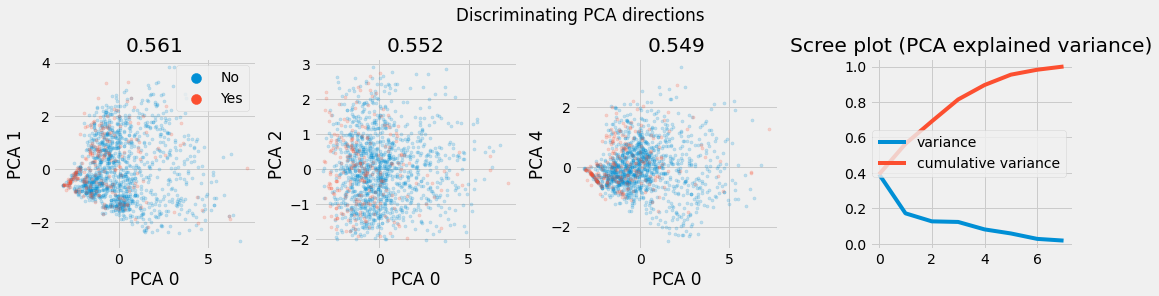

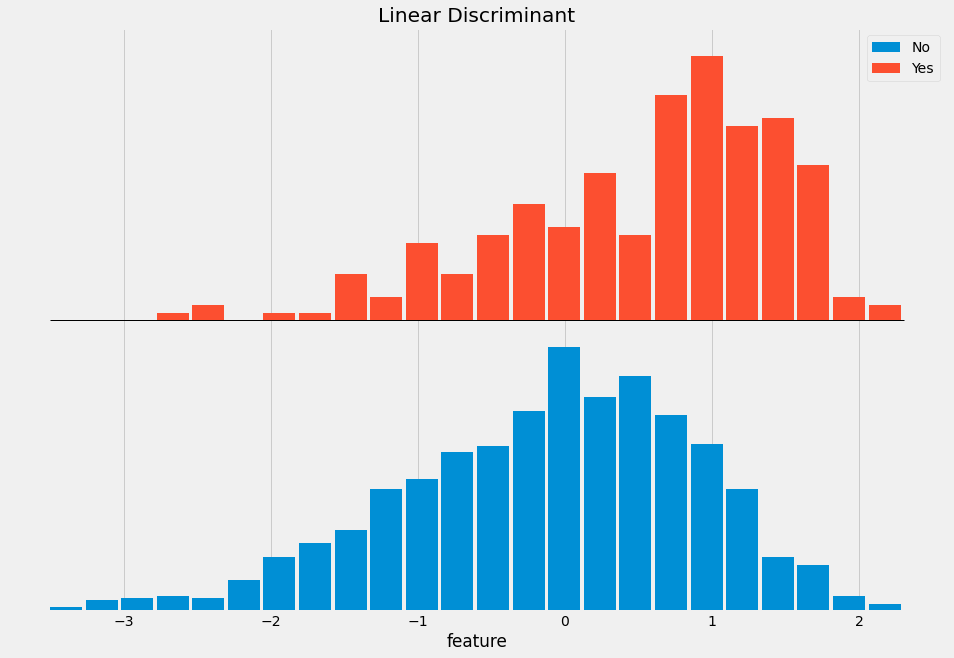

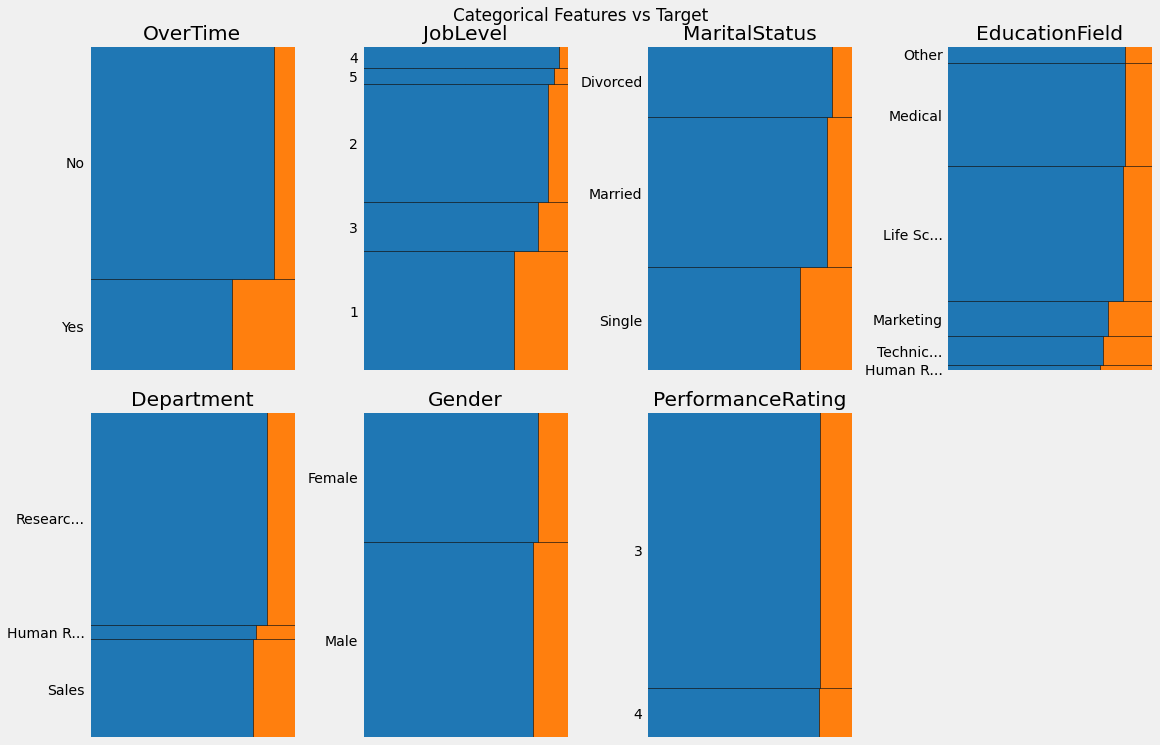

In [16]:
dabl.plot(data, target_col='Attrition')

## Interactive Analysis

In [17]:
@interact
def check(column1=list(data.select_dtypes('number').columns[1:]),
           column2=list(data.select_dtypes('number').columns[2:])):
    print('correlation:', data[column1].corr(data[column2]))

interactive(children=(Dropdown(description='column1', options=('EmployeeNumber', 'Age', 'JobLevel', 'MonthlyIn…

In [18]:
@interact
def check(column1=list(data.select_dtypes('number').columns[1:]),
         column2=list(data.select_dtypes('number').columns[2:])):
    print('Covariance: ', data[column1].cov(data[column2]))

interactive(children=(Dropdown(description='column1', options=('EmployeeNumber', 'Age', 'JobLevel', 'MonthlyIn…

In [19]:
@interact
def check(column1=list(data.select_dtypes('number').columns[1:])):
    print('Maximum Value :', data[column1].max())

interactive(children=(Dropdown(description='column1', options=('EmployeeNumber', 'Age', 'JobLevel', 'MonthlyIn…

In [20]:
@interact
def check(column1 = list(data.select_dtypes('number').columns[1:])):
    print("Minimum Value :", data[column1].min())

interactive(children=(Dropdown(description='column1', options=('EmployeeNumber', 'Age', 'JobLevel', 'MonthlyIn…

In [21]:
@interact
def check(column1 = list(data.select_dtypes('number').columns[1:])):
    print("Average Value :", data[column1].mean())

interactive(children=(Dropdown(description='column1', options=('EmployeeNumber', 'Age', 'JobLevel', 'MonthlyIn…

In [22]:
@interact
def check(column1 = list(data.select_dtypes('number').columns[1:])):
    print("Standard Devaiation :", data[column1].std())

interactive(children=(Dropdown(description='column1', options=('EmployeeNumber', 'Age', 'JobLevel', 'MonthlyIn…

In [23]:
@interact
def check(column1=list(data.select_dtypes('number').columns[1:])):
    print("Maximum Value:", data[column1].max())
    print("Minimum Value:", data[column1].min())
    print("Average Value:", data[column1].mean())
    print("Standard Deviation:", data[column1].std())
    print("Variance:", data[column1].var())

interactive(children=(Dropdown(description='column1', options=('EmployeeNumber', 'Age', 'JobLevel', 'MonthlyIn…

In [28]:
@interact
def check(column1=['MonthlyIncome'], values=26000):
    x=data[data[column1]>values][['EmployeeNumber','MonthlyIncome', 'PerformanceRating']]
    x=x.sort_values(by='MonthlyIncome', ascending=False)
    return x

interactive(children=(Dropdown(description='column1', options=('MonthlyIncome',), value='MonthlyIncome'), IntS…

## Data Visualization

In [29]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [32]:
plt.rcParams['figure.figsize']=(15, 5)
plt.style.use('fivethirtyeight')

In [33]:
@interact_manual
def check(column1=list(data.select_dtypes('number').columns[1:]),
         column2=list(data.select_dtypes('number').columns[2:])):
    sns.scatterplot(data[column1], data[column2])

interactive(children=(Dropdown(description='column1', options=('EmployeeNumber', 'Age', 'JobLevel', 'MonthlyIn…

In [42]:
@interact_manual
def check(column1=list(data.select_dtypes('number').columns[1:]),
         column2=list(data.select_dtypes('number').columns[2:])):
    sns.barplot(data[column1], data[column2])


interactive(children=(Dropdown(description='column1', options=('EmployeeNumber', 'Age', 'JobLevel', 'MonthlyIn…

In [40]:
@interact_manual
def check(column1=list(data.select_dtypes('object').columns[1:]),
         column2=list(data.select_dtypes('number').columns[2:])):
    sns.violinplot(data[column1], data[column2])

interactive(children=(Dropdown(description='column1', options=('MaritalStatus', 'EducationField', 'Department'…

In [48]:
@interact_manual
def check(column1=list(data.select_dtypes('object').columns[1:]),
          column2=list(data.select_dtypes('number').columns[2:])):
    sns.boxplot(data[column1], data[column2])

interactive(children=(Dropdown(description='column1', options=('MaritalStatus', 'EducationField', 'Department'…

In [49]:
@interact_manual
def check(column1=list(data.select_dtypes('object').columns[1:]),
         column2=list(data.select_dtypes('number').columns[2:])):
    sns.boxenplot(data[column1], data[column2])

interactive(children=(Dropdown(description='column1', options=('MaritalStatus', 'EducationField', 'Department'…

In [52]:
@interact_manual
def check(column1=list(data.select_dtypes('object').columns[1:]),
         column2=list(data.select_dtypes('object').columns[2:])):
    x=pd.crosstab(data[column1], data[column2])
    x.plot(kind='bar', stacked=False)

interactive(children=(Dropdown(description='column1', options=('MaritalStatus', 'EducationField', 'Department'…

In [59]:
@interact_manual
def check(column1=list(data.select_dtypes('number').columns[1:]),
          column2=list(data.select_dtypes('number').columns[2:]),
          color=list(data.select_dtypes('object').columns[3:]),
          size=list(data.select_dtypes('number').columns[4:])):
    sns.scatterplot(data[column1],
                   data[column2],
                   hue=data[color], size=data[size])

interactive(children=(Dropdown(description='column1', options=('EmployeeNumber', 'Age', 'JobLevel', 'MonthlyIn…